# Diviations plots

In [1]:
from plots_generation import Drawing_plots
import pandas as pd
import numpy as np
data = pd.read_json("deviations.json")

## Поиск углов
Исследуем, насколько хорошо модель определяет углы.

'plots/gt_corners rb_corners pie.png'

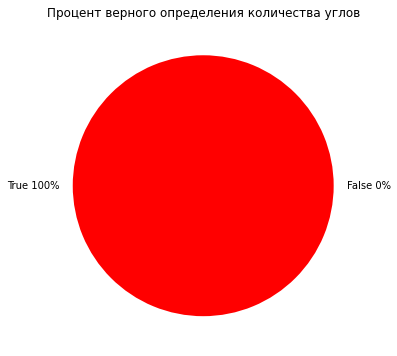

In [2]:
Drawing_plots("pie",["gt_corners", "rb_corners"], mean_line= True).drawing_plots()

## Частотное распределение
Построим частотное распределение значений для MIN, MEAN и MAX значений. Также покажем среднее для этих данных

'plots/min mean max hist.png'

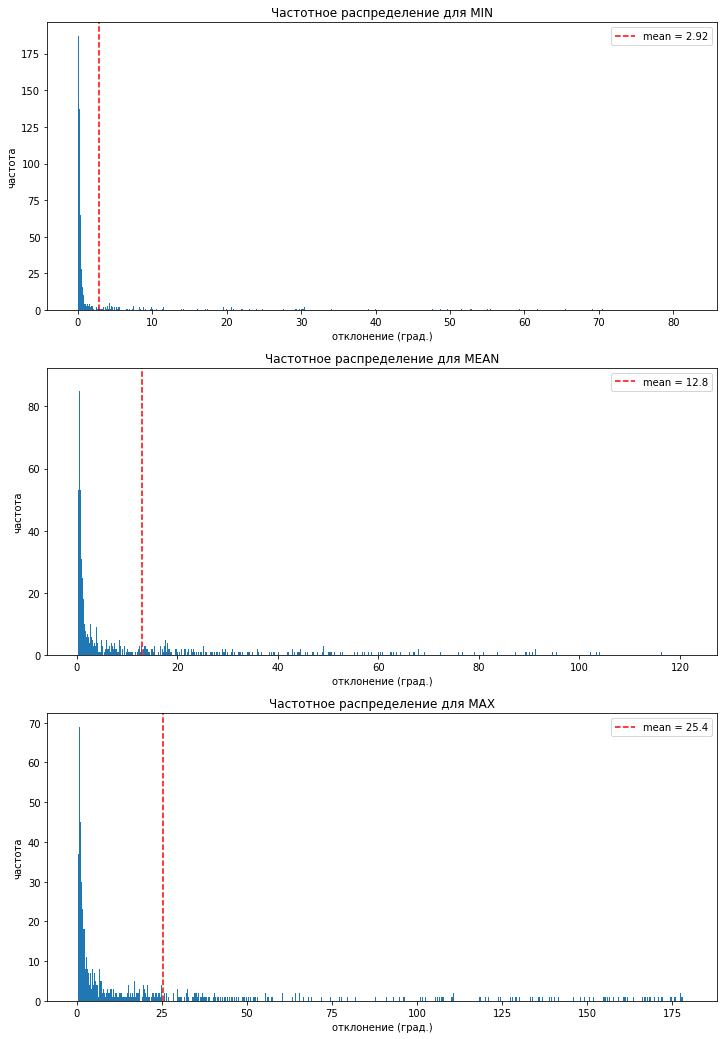

In [3]:
Drawing_plots("hist",["min", "mean", "max"], mean_line= True).drawing_plots()


Гистограммы частот появления значений (градусов) не сильно информативны. Попробуем построить гистограммы частот от десятичного логорифма градусов.

In [4]:
Drawing_plots("hist_lg",["min", "mean", "max"], mean_line= True).drawing_plots()

## ПОЛ VS ПОТОЛОК
Обрабатывать будем среднее (mean) значение для пола и потолка каждой комнаты, как самое информативное.

Гипотеза 0: между средними значениями отклонений для точек пола и потолка нет существенных отличий.

Гипотеза 1: существуют весомые отличия между данными группами.

'plots/floor mean ceiling mean boxplot.png'

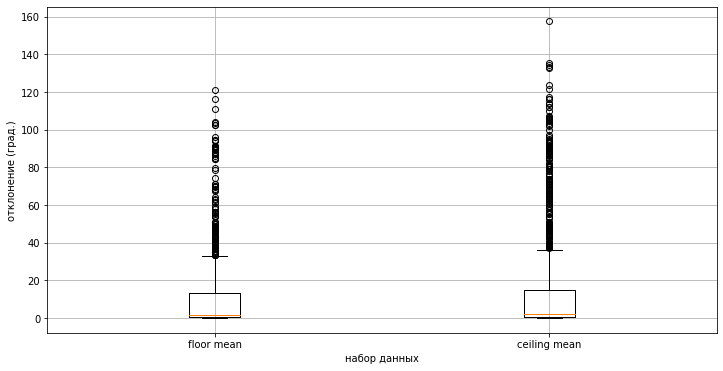

In [ ]:
Drawing_plots("boxplot",[data.floor_mean, data.ceiling_mean], labels= ["floor mean", "ceiling mean"]).drawing_plots()

Большое количество выбивающихся значений. Для наглядности графика построим его не от градусов, а от десятичного логорифма градусов

'plots/lg of floor mean lg of ceiling mean boxplot.png'

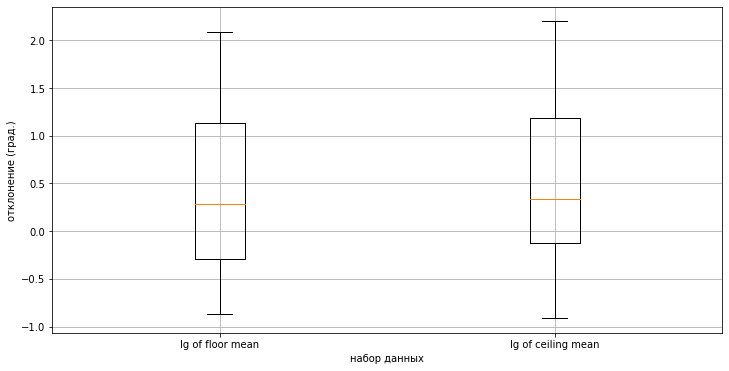

In [ ]:
Drawing_plots("boxplot",[np.log10(data.floor_mean), np.log10(data.ceiling_mean)], labels= ["lg of floor mean", "lg of ceiling mean"]).drawing_plots()

Хоть по графику и видно, что особых отличий нет, дополнительно был проведен U-критерий Манна-Уитни (10000 сравнений, выборки по 300 элементов). Для этих групп данных отличий нет только в 30% повторений, а значит НЕЛЬЗЯ говорить о том, что группы данных не отличаются.

## Различия в данных из-за разного количества углов

Рассматривать будем средние значения (mean), как самые информативные.

Гипотеза 0: данные не зависят от количества углов

Гипотеза 1: данные отличаются в зависимости от количества углов

'plots/4 corners 6 corners 8 corners 10 corners boxplot.png'

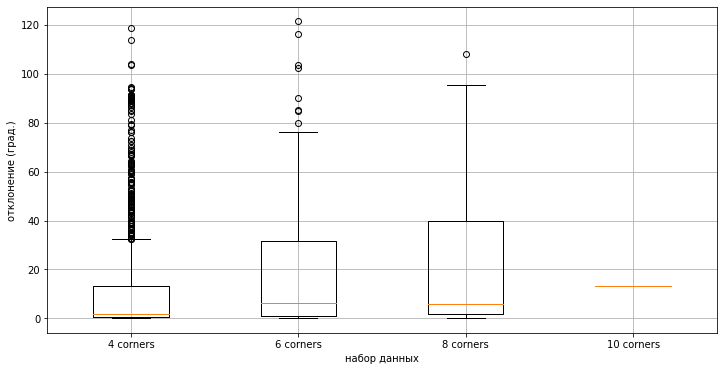

In [ ]:
Drawing_plots("boxplot",[data.loc[data.rb_corners == 4]["mean"], data.loc[data.rb_corners == 6]["mean"],data.loc[data.rb_corners == 8]["mean"], data.loc[data.rb_corners == 10]["mean"]], labels=["4 corners", "6 corners", "8 corners","10 corners"]).drawing_plots()

Для наглядности графика построим его не от градусов, а от десятичного логорифма градусов

'plots/4 corners 6 corners 8 corners 10 corners boxplot.png'

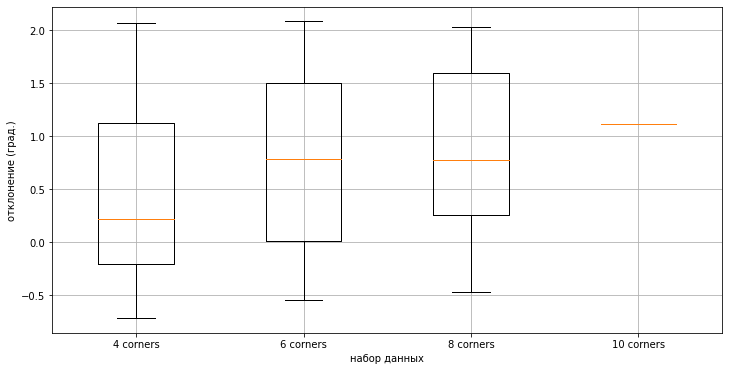

In [ ]:
Drawing_plots("boxplot",[np.log10(data.loc[data.rb_corners == 4]["mean"]), np.log10(data.loc[data.rb_corners == 6]["mean"]),np.log10(data.loc[data.rb_corners == 8]["mean"]), np.log10(data.loc[data.rb_corners == 10]["mean"])], labels=["4 corners", "6 corners", "8 corners","10 corners"]).drawing_plots()

Наблюдается отличие в данных в зависимости от количества углов. Дополнительно был проиведен Тест Крускала-Уоллиса, который показал что распределение данных по всем группам отличается.